<a href="https://colab.research.google.com/github/Carmen-88/DSC-502/blob/main/HW3_CSchuler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# read WorldCupMatches file to a data frame
df = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
print(df.head())

   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                     3                     0   
1     

**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

/tmp/ipython-input-2423310929.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="Year", hue="Home Team Goals", kind="kde")


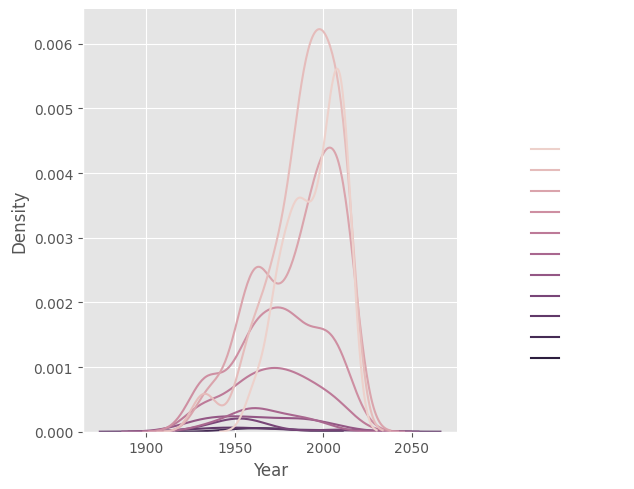

In [32]:
sns.displot(df, x="Year", hue="Home Team Goals", kind="kde")

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

/tmp/ipython-input-1807614555.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0, 0, '1930'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, '1950'),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, '1970'),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, '1990'),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, '2010'),
 Text(19, 0, '')]

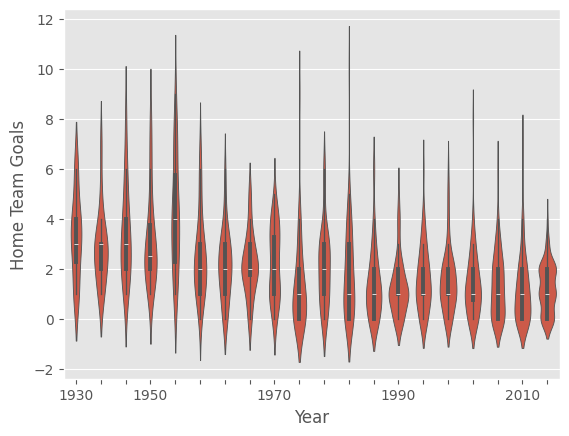

In [33]:
ax = sns.violinplot(data=df, x='Year', y='Home Team Goals')
labels=[x if x%10==0 else None for x in list(df.Year.unique())]
ax.set_xticklabels(labels)

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [34]:
!pip install joypy

In [35]:
import joypy as jp

(<Figure size 640x480 with 21 Axes>,
 [<Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >])

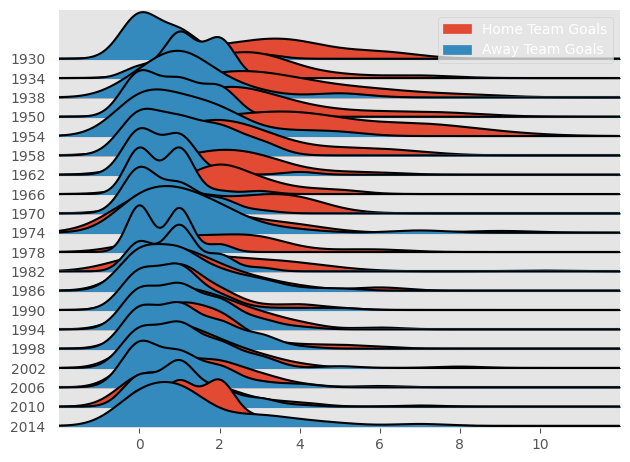

In [36]:
jp.joyplot(data=df, column=['Home Team Goals', 'Away Team Goals'], by='Year', ylim='own', legend = True )

(<Figure size 640x480 with 21 Axes>,
 [<Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >])

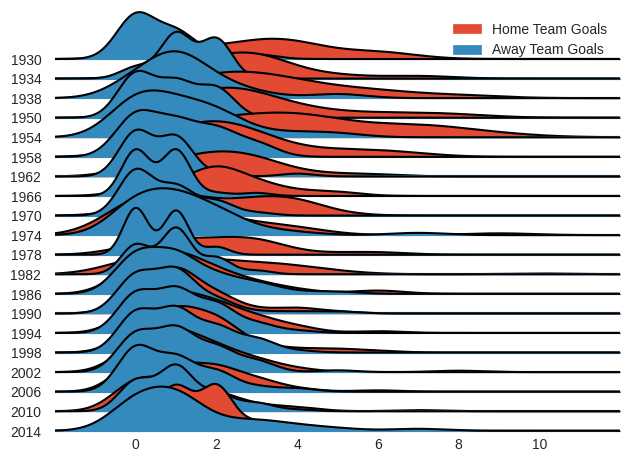

In [37]:
#print(plt.style.available)
plt.style.use('seaborn-v0_8-white')
jp.joyplot(data=df, column=['Home Team Goals', 'Away Team Goals'], by='Year', ylim='own', legend=True)

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



In [38]:
HomeTeam_Goals_Sum = df.groupby(['Home Team Initials'])['Home Team Goals'].sum().reset_index()
print(HomeTeam_Goals_Sum.head())

  Home Team Initials  Home Team Goals
0                ALG                5
1                ANG                0
2                ARG              111
3                AUS                7
4                AUT               31


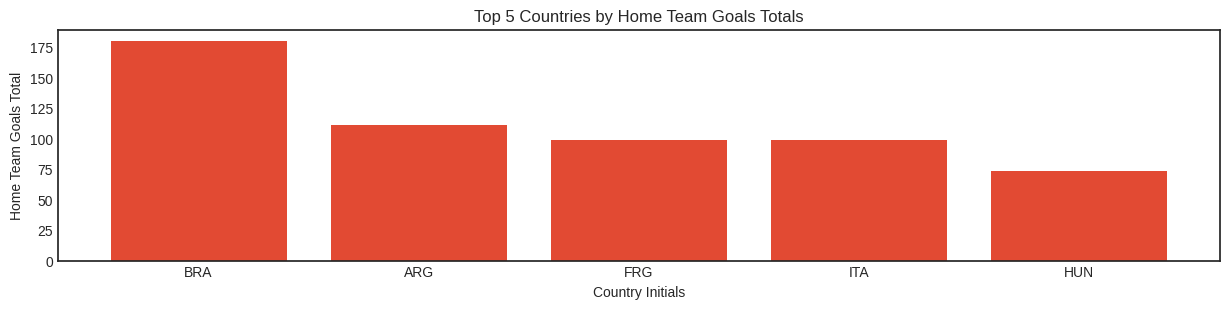

In [39]:
Top_5 = HomeTeam_Goals_Sum.sort_values(by='Home Team Goals', ascending=False).head(5)

plt.figure(figsize=(15, 3))
plt.bar(Top_5['Home Team Initials'], Top_5['Home Team Goals'])

plt.title('Top 5 Countries by Home Team Goals Totals', fontsize=12)
plt.xlabel('Country Initials', fontsize=10)
plt.ylabel('Home Team Goals Total', fontsize=10)

plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



In [40]:
!pip install joypy
import joypy as jp

(<Figure size 640x480 with 5 Axes>,
 [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >])

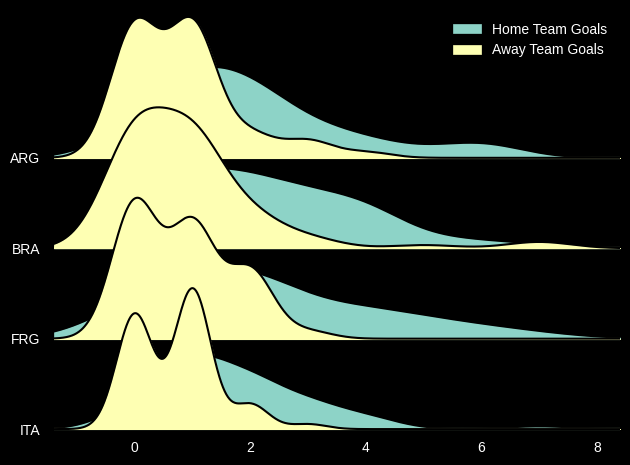

In [41]:
plt.style.use('dark_background')

Top_4 = ['BRA', 'ARG', 'FRG', 'ITA']
df_top4 = df[df['Home Team Initials'].isin(Top_4)]

jp.joyplot(data=df_top4, column=['Home Team Goals', 'Away Team Goals'], by='Home Team Initials', ylim='own', legend=True)

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [22]:
!pip install seaborn_qqplot

In [23]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme.


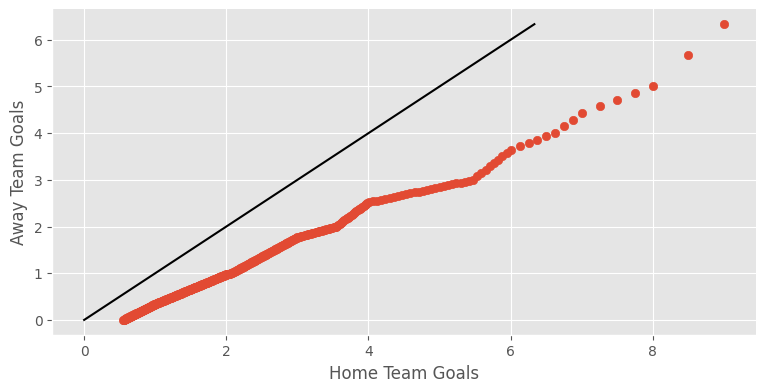

In [27]:
pplot(df, x='Home Team Goals', y='Away Team Goals', kind = 'qq', display_kws={"identity":True}, height=4, aspect=2)

#From this figure, it does not look like the distributions of Home Team Goals and Away Team Goals agree since no points are on or close to the straight line.